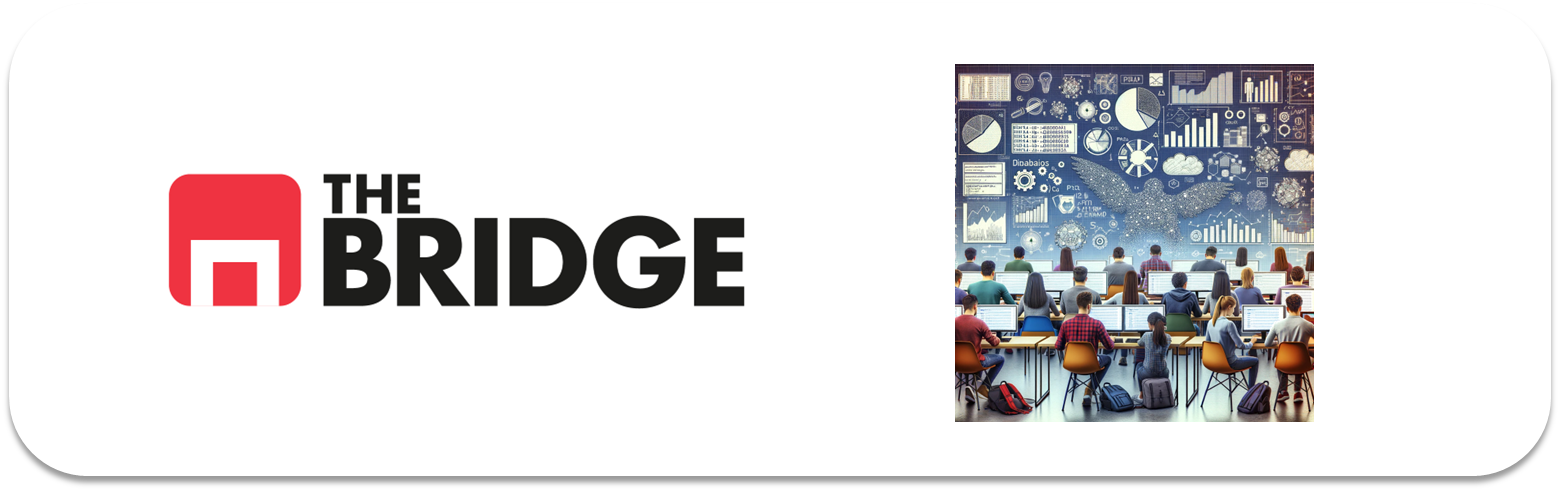

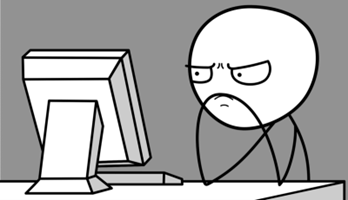

Para ejercitarte y afianzar lo aprendido sobre **Regularización**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')

En estos ejercicios vamos a repasar la regularización sobre regresión lineal obteniendo primero un modelo de regresión lineal para predecir el precio de un coche y luego los equivalentes con penalizaciones L2 (Ridge), L1 (Lasso) y con la combinación de ambas (ElasticNet)

### Ejercicio 1

Carga el dataset de partida ("./data/CarPrice_Assignment.csv") en el que tenemos diferentes modelos de coches con sus características y el precio de estos. Échale un vistazo

In [2]:
df_cars = pd.read_csv('./data/CarPrice_Assignment.csv')
df_cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df_cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Ejercicio 2

Identifica la variable target y asignala a una variable de nombre `target`, luego elimina de forma permanente el campo "car_ID"

In [5]:
target = 'price'
df_cars[target]

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [6]:
df_cars.drop(columns=['car_ID'], inplace=True)
df_cars

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Ejercicio 3

Haz un split del dataset en train y test al 80/20 empleando la función de sklearn que ya conoces

In [7]:
X = df_cars.drop(columns=['price'])
y = df_cars[target]
# y = pd.Series(df_cars[target], name=target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 24)
(41, 24)
(164,)
(41,)


### Ejercicio 4

Aunque vamos a emplear todas las variabes numéricas del dataset como predictores o features, obten la correlación de todas ellas con el target y escoge los que creas que son tus tres mejores predictores. Crea una lista con los nombres de las variables numéricas y llámalo `features_num`

<Axes: >

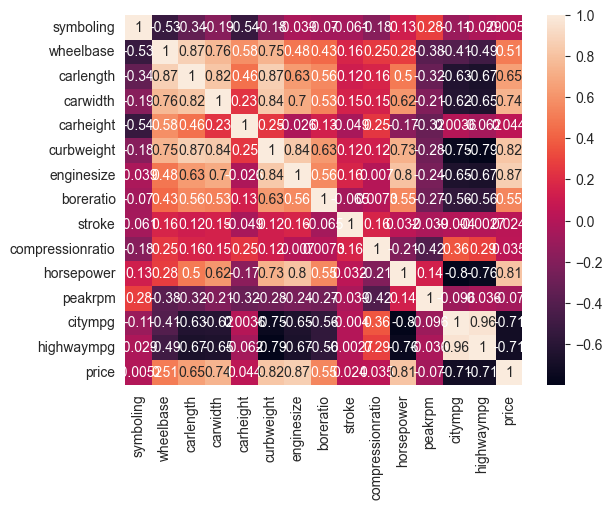

In [8]:
# Gráficamente no se va a aprecias nada por la gran cantidad de variables
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(numeric_only=True),
            annot=True)

In [9]:
correlations = X_train.corrwith(y_train, numeric_only=True)

best_predictors = correlations.abs().sort_values(ascending=False).index[:3]

features_num = X_train.select_dtypes(include=['number']).columns.tolist()

# Mostramos las correlaciones y los tres mejores predictores
print('Correlaciones de las variables con el target:', correlations,sep='\n')
print('\nMejores predictores:', best_predictors)

# Lista completa de características numéricas
print('\nLista de caracterísitcas numéricas', features_num)

Correlaciones de las variables con el target:
symboling          -0.005183
wheelbase           0.506118
carlength           0.652071
carwidth            0.744310
carheight           0.044458
curbweight          0.824212
enginesize          0.866433
boreratio           0.546099
stroke              0.023941
compressionratio    0.035218
horsepower          0.810986
peakrpm            -0.070017
citympg            -0.711245
highwaympg         -0.713503
dtype: float64

Mejores predictores: Index(['enginesize', 'curbweight', 'horsepower'], dtype='object')

Lista de caracterísitcas numéricas ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


### Ejercicio 5

Completa el siguiente código que tiene como objetivo generar un modelo de regresión lineal utilizando todos los valores de las variables (salvo la target):

In [10]:
train_set, test_set = train_test_split(df_cars, test_size=0.2, random_state=42)
print(train_set.shape)
print(test_set.shape)

target = 'price'

# Separación x e y
X_train = train_set.drop(columns=[target])
y_train = train_set[target]
X_test = test_set.drop(columns=[target])
y_test = test_set[target]

scaler = StandardScaler()

# Primero ajusta (entrena) y luego transforma
X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns=features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns=features_num)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


(164, 25)
(41, 25)


LinearRegression()

### Ejercicio 6

Obten el MAE, RMSE y $R^2$ para las predicciones sobre train (X_train) y para las predicciones sobre test (X_test). ¿Podemos esperar una buena generalización?

In [11]:
pred_train = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

# TRAIN error
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('RMSE train', metrics.root_mean_squared_error(y_train, pred_train))
print('R2 train', lin_reg.score(X_train, y_train))

# TEST error
print('\nMAE test', metrics.mean_absolute_error(y_test, pred_test))
print('RMSE test', metrics.root_mean_squared_error(y_test, pred_test))
print('R2 test', lin_reg.score(X_test, y_test))


MAE train 2186.495238619768
RMSE train 2911.593458582073
R2 train 0.8578523829898764

MAE test 2680.4299831594244
RMSE test 3789.1990073033144
R2 test 0.8181239192410048


### Ejercicio 7
 
Vamos a regularizar, crea un `regresor Ridge` con alpha inicial a 10 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train

In [12]:
# Modelo de regresión lineal con penalización. Alpha es lambda.
ridgeR = Ridge(alpha=10) 
ridgeR.fit(X_train, y_train)
pred_train_Ridge = ridgeR.predict(X_train)
pred_test_Ridge = ridgeR.predict(X_test)

# TRAIN error sin Regularización (igual que original)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('RMSE train', metrics.root_mean_squared_error(y_train, pred_train))
print('R2 train', lin_reg.score(X_train, y_train))

# TRAIN error con Regularización Ridge
print('\nMAE train con regularización', metrics.mean_absolute_error(y_train, pred_train_Ridge))
print('RMSE train con regularización', metrics.root_mean_squared_error(y_train, pred_train_Ridge))
print('R2 train con regularización', ridgeR.score(X_train, y_train))


MAE train 2186.495238619768
RMSE train 2911.593458582073
R2 train 0.8578523829898764

MAE train con regularización 2158.243656697338
RMSE train con regularización 2977.60362006191
R2 train con regularización 0.8513339231129411


>Hemos ganado en velocidad del modelo, y simplificado.

### Ejercicio 8

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que la regresión lineal sin regularizar?

In [13]:
# TEST error sin Regularización (igual que antes)
print('MAE test', metrics.mean_absolute_error(y_test, pred_test))
print('RMSE test', metrics.root_mean_squared_error(y_test, pred_test))
print('R2 test', lin_reg.score(X_test, y_test))

# TEST error con Regularización Ridge
print('\nMAE test con regularización', metrics.mean_absolute_error(y_test, pred_test_Ridge))
print('RMSE test con regularización', metrics.root_mean_squared_error(y_test, pred_test_Ridge))
print('R2 test con regularización', ridgeR.score(X_test, y_test))

MAE test 2680.4299831594244
RMSE test 3789.1990073033144
R2 test 0.8181239192410048

MAE test con regularización 2683.5502270180973
RMSE test con regularización 3757.5201626561297
R2 test con regularización 0.821152284676628


> Generalizando me parece similar a la regresión lineal simple.

### Ejercicio 9
 
Ahora crea un regresor `Lasso` con alpha inicial a 125 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train.

In [14]:
lassoR = Lasso(alpha=125)
lassoR.fit(X_train, y_train)
pred_train_lasso = lassoR.predict(X_train)
pred_test_lasso = lassoR.predict(X_test)

# TRAIN error sin Regularización (igual que original)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('RMSE train', metrics.root_mean_squared_error(y_train, pred_train))
print('R2 train', lin_reg.score(X_train, y_train))

# TRAIN error con Regularización Lasso
print('\nMAE train con regularización', metrics.mean_absolute_error(y_train, pred_train_lasso))
print('RMSE train con regularización', metrics.root_mean_squared_error(y_train, pred_train_lasso))
print('R2 train con regularización', lassoR.score(X_train, y_train))


MAE train 2186.495238619768
RMSE train 2911.593458582073
R2 train 0.8578523829898764

MAE train con regularización 2160.7677449902203
RMSE train con regularización 2979.4555079978572
R2 train con regularización 0.85114894313351


### Ejercicio 10

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que los otros dos modelos?

In [15]:
# TEST error sin Regularización (igual que original)
print('MAE test', metrics.mean_absolute_error(y_test, pred_test))
print('RMSE test', metrics.root_mean_squared_error(y_test, pred_test))
print('R2 test', lin_reg.score(X_test, y_test))

# TEST error con Regularización Lasso
print('\nMAE test con regularización', metrics.mean_absolute_error(y_test, pred_test_lasso))
print('RMSE test con regularización', metrics.root_mean_squared_error(y_test, pred_test_lasso))
print('R2 test con regularización', lassoR.score(X_test, y_test))

MAE test 2680.4299831594244
RMSE test 3789.1990073033144
R2 test 0.8181239192410048

MAE test con regularización 2720.0084839611914
RMSE test con regularización 3767.749439656909
R2 test con regularización 0.8201771878116615


> Hemos subido el error MAE y R^2 de test. Creo que no es bentajoso.

### Ejercicio 11

Repite los ejercicios 9 y 10 con un regresos `ElasticNet` con alpha 0.2 y l1_ratio a 0.7. ¿Es mejor generalizando que el resto?

In [16]:
# Regresión lineal con penalización. ElasticNet.
elastic_net = ElasticNet(alpha = 0.2, l1_ratio=0.7)
elastic_net.fit(X_train, y_train)
pred_train_enet = elastic_net.predict(X_train)
pred_test_enet = elastic_net.predict(X_test)

# TRAIN error sin Regularización (igual que original)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('RMSE train', metrics.root_mean_squared_error(y_train, pred_train))
print('R2 train', lin_reg.score(X_train, y_train))

# TRAIN error con Regularización ElasticNet
print('\nMAE train con regularización', metrics.mean_absolute_error(y_train, pred_train_enet))
print('RMSE train con regularización', metrics.root_mean_squared_error(y_train, pred_train_enet))
print('R2 train con regularización', elastic_net.score(X_train, y_train))

# TEST error sin Regularización (igual que original)
print('\nMAE test', metrics.mean_absolute_error(y_test, pred_test))
print('RMSE test', metrics.root_mean_squared_error(y_test, pred_test))
print('R2 test', lin_reg.score(X_test, y_test))

# TEST error con Regularización ElasticNet
print('\nMAE test con regularización', metrics.mean_absolute_error(y_test, pred_test_enet))
print('RMSE test con regularización', metrics.root_mean_squared_error(y_test, pred_test_enet))
print('R2 test con regularización', elastic_net.score(X_test, y_test))

MAE train 2186.495238619768
RMSE train 2911.593458582073
R2 train 0.8578523829898764

MAE train con regularización 2158.1465786718622
RMSE train con regularización 2976.651008914379
R2 train con regularización 0.8514290320166742

MAE test 2680.4299831594244
RMSE test 3789.1990073033144
R2 test 0.8181239192410048

MAE test con regularización 2683.009361902569
RMSE test con regularización 3756.4490075162134
R2 test con regularización 0.8212542382711894


> Pues lo veo algo mejor pero bastante similar también. Me falta alguna herramienta clara para decantarme por un modelo u otro.

### Ejercicio 12

¿Qué podrías hacer para mejorar los regresores regularizados?

1. Escalar los datos (ya lo hemos hecho).
2. Optimizar los hiperparámetros (alpha o l1_ratio).
3. Validación cruzada con otros modelos.
4. ElasticNet permite combinar las regularizaciones L1 y L2.
5. Si es posible, aumentar el tamaño del conjunto de datos los modelos regularizados tienden a beneficiarse de más datos
6. Eliminar características irrelevantes o añadir nuevas
7. Si crees que las relaciones entre las variables no son lineales, se puede utilizar la clase PolynomialFeatures.

### EXTRA:

Utiliza la función siguiente para pintar la importancia de los coeficientes en cada uno de los cuatro modelos y observa el efecto de las penalizaciones de cada una de las regularizaciones:

In [17]:
def show_coefs(model, figsize=(10, 5)):
    '''
    Visualizes the coefficients of a fitted regression model.

    This function creates a horizontal bar plot of the model's coefficients.
    It displays two subplots: one showing the original coefficients and the other
    showing the absolute values of the coefficients sorted in ascending order. 
    Additionally, it returns a DataFrame containing the coefficients.

    Parameters
    ----------
    model : sklearn.base.RegressorMixin
        A fitted scikit-learn regression model. The model should have the attributes 
        `coef_` (the model's coefficients) and `feature_names_in_` (the names of the features).
    
    figsize : tuple, optional, default=(10, 5)
        The size of the figure for the bar plots. It is passed to `matplotlib.pyplot.subplots`.
    
    Returns
    -------
    df_coef : pandas.DataFrame
        A DataFrame containing the coefficients of the model. The index consists of the feature 
        names and the single column is labeled "coefs".
    
    Example
    -------
    >>> from sklearn.linear_model import Ridge
    >>> model = Ridge().fit(X_train, y_train)
    >>> show_coefs(model)
    
    Notes
    -----
    This function requires the model to have been trained on the dataset with the `coef_` 
    and `feature_names_in_` attributes, which are standard for linear models like 
    `Ridge`, `Lasso`, or `LinearRegression` in scikit-learn.
    '''
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle(f"Model Coefficients - {str(model)}")

    fig.tight_layout()

    return df_coef

,coefs
symboling,298.186870
wheelbase,400.487326
carlength,-264.005043
carwidth,1075.748004
carheight,288.803417
curbweight,797.255150
enginesize,3678.052872
boreratio,-40.367076
stroke,-800.167127
compressionratio,1004.958358


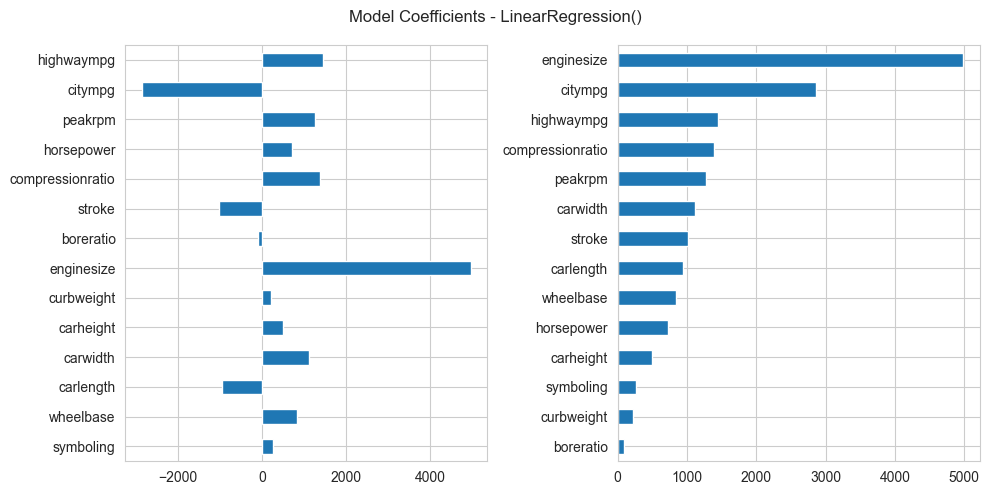

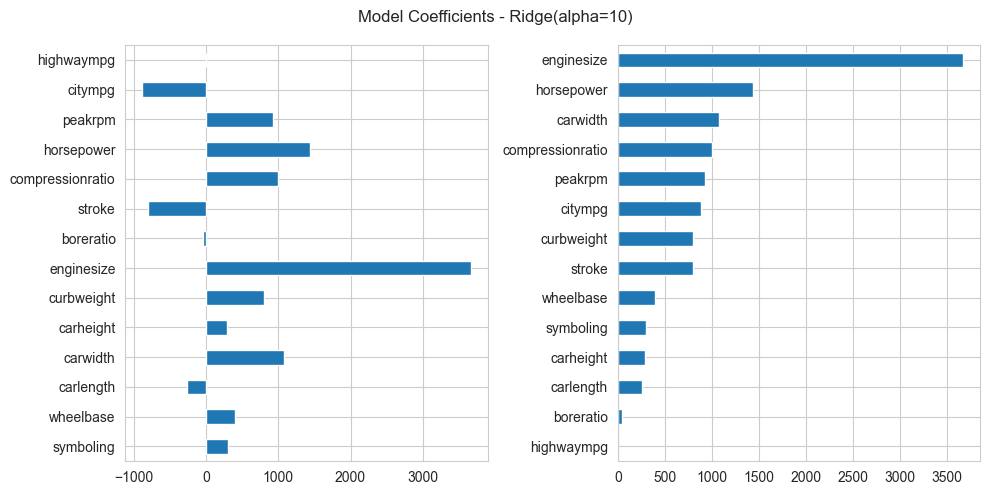

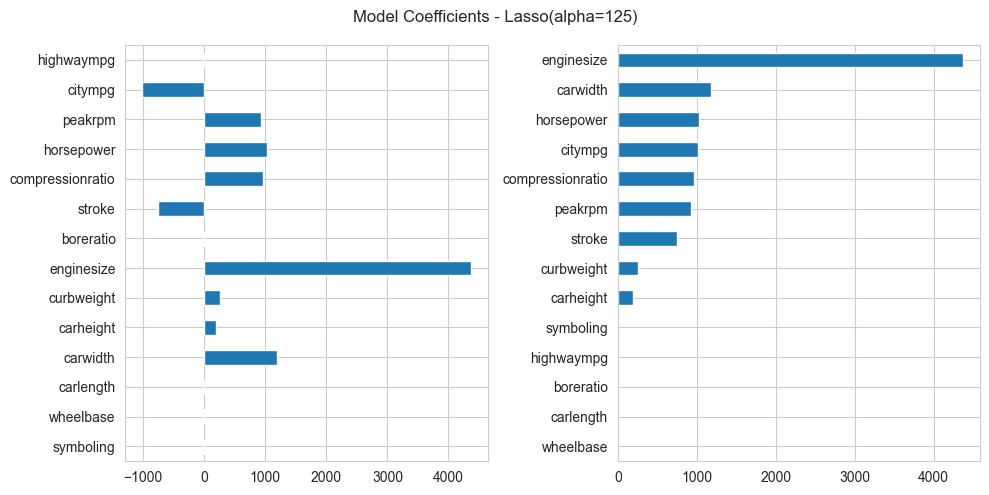

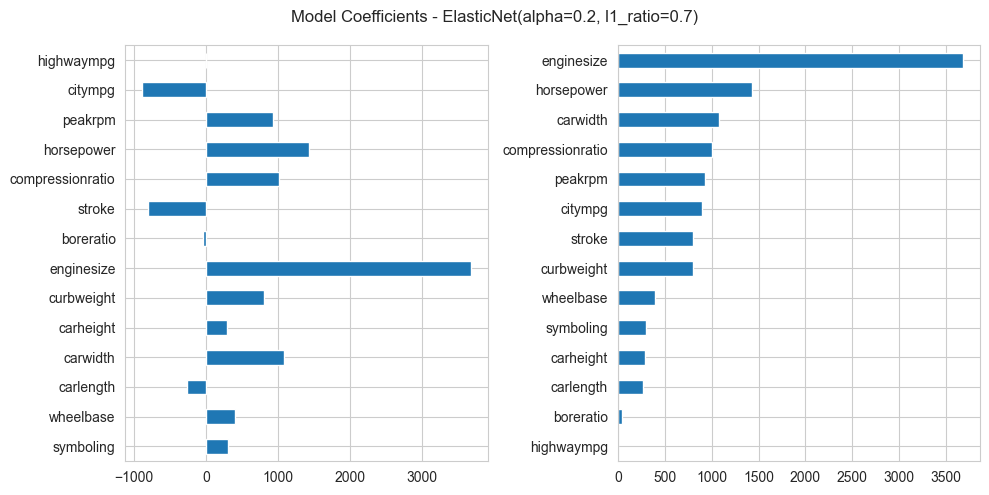

In [18]:
show_coefs(lin_reg)
show_coefs(ridgeR)
show_coefs(lassoR)
show_coefs(elastic_net)